<a href="https://colab.research.google.com/github/ShaeeraIslam/Alzheimer-s-Detection-using-Machine-Learning/blob/main/ShaeeraIslam/Deep-Learning-Practice-Assignments/SIT744_Assignment_1_Shaeera_Islam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set A

# 1.1 Problem Description
# Forecasting Energy Consumption in a Smart Building

problem_description =
The goal is to forecast hourly energy consumption in a smart building using historical energy usage data and environmental variables.
Objectives:
- Build a simple regression model using a neural network.
- Predict future energy consumption values.

Ethical Concerns:
- Dataset may reflect biases in occupancy patterns, seasonal factors, or geographic energy usage.
- Potential overfitting on specific days or temperature ranges.
- Data privacy if sensor data is too granular.

print(problem_description)


In [1]:
# 1.2 Dataset Selection and Preprocessing

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load UCI energy dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"
df = pd.read_csv(url)

# Features and target
features = df[['T1', 'RH_1', 'T2', 'RH_2', 'T_out', 'RH_out']]
target = df['Appliances']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
# 1.3 Build a simple fully connected network
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

class EnergyNN(nn.Module):
    def __init__(self):
        super(EnergyNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)


In [3]:
# 1.4 Training loop
model = EnergyNN()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(50):
    model.train()
    running_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}: Loss = {running_loss:.4f}")


Epoch 1: Loss = 4933885.0371
Epoch 2: Loss = 4686893.8062
Epoch 3: Loss = 4273011.3218
Epoch 4: Loss = 3798956.2612
Epoch 5: Loss = 3362476.9548
Epoch 6: Loss = 3057029.7314
Epoch 7: Loss = 2876322.1094
Epoch 8: Loss = 2777188.5295
Epoch 9: Loss = 2720571.7346
Epoch 10: Loss = 2675190.8628
Epoch 11: Loss = 2643007.8308
Epoch 12: Loss = 2614143.9702
Epoch 13: Loss = 2587529.4292
Epoch 14: Loss = 2561490.8721
Epoch 15: Loss = 2538924.4175
Epoch 16: Loss = 2519877.3538
Epoch 17: Loss = 2508657.9641
Epoch 18: Loss = 2495566.9126
Epoch 19: Loss = 2486062.4406
Epoch 20: Loss = 2477547.7759
Epoch 21: Loss = 2470587.8168
Epoch 22: Loss = 2466095.9091
Epoch 23: Loss = 2461375.6223
Epoch 24: Loss = 2457668.0525
Epoch 25: Loss = 2453482.3296
Epoch 26: Loss = 2448916.6904
Epoch 27: Loss = 2454456.2786
Epoch 28: Loss = 2446451.3442
Epoch 29: Loss = 2443984.0618
Epoch 30: Loss = 2440674.9990
Epoch 31: Loss = 2441003.8477
Epoch 32: Loss = 2438908.2444
Epoch 33: Loss = 2436219.9545
Epoch 34: Loss = 24

In [4]:
# Evaluate
model.eval()
with torch.no_grad():
    test_preds = model(X_test_tensor)
    test_loss = criterion(test_preds, y_test_tensor)
    print(f"Test MSE Loss: {test_loss.item():.4f}")


Test MSE Loss: 9185.4688


Set b - credit

In [5]:
# 2.1 Add TensorBoard
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter()

# Add more layers to improve
class ImprovedNN(nn.Module):
    def __init__(self):
        super(ImprovedNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

model = ImprovedNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Log to TensorBoard
for epoch in range(50):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    writer.add_scalar("Loss/train", epoch_loss, epoch)
    print(f"Epoch {epoch+1}: {epoch_loss:.4f}")

writer.close()


Epoch 1: 4354816.7173
Epoch 2: 2835968.5085
Epoch 3: 2652003.9253
Epoch 4: 2565396.0458
Epoch 5: 2519392.2739
Epoch 6: 2495094.6870
Epoch 7: 2482428.9202
Epoch 8: 2476253.1990
Epoch 9: 2466864.2012
Epoch 10: 2462647.6384
Epoch 11: 2458049.7900
Epoch 12: 2455566.1094
Epoch 13: 2450716.8862
Epoch 14: 2448914.9033
Epoch 15: 2443861.6278
Epoch 16: 2441162.7769
Epoch 17: 2441307.8821
Epoch 18: 2441431.6208
Epoch 19: 2433615.9709
Epoch 20: 2430641.2720
Epoch 21: 2431858.3235
Epoch 22: 2431837.6859
Epoch 23: 2430010.3096
Epoch 24: 2426931.4287
Epoch 25: 2423801.5942
Epoch 26: 2424061.6742
Epoch 27: 2420547.5437
Epoch 28: 2418304.0000
Epoch 29: 2418207.5137
Epoch 30: 2415183.4990
Epoch 31: 2415630.6807
Epoch 32: 2412905.7637
Epoch 33: 2412888.9231
Epoch 34: 2412497.9873
Epoch 35: 2411014.7948
Epoch 36: 2410429.7515
Epoch 37: 2411948.9615
Epoch 38: 2407971.8787
Epoch 39: 2406038.7742
Epoch 40: 2404580.3147
Epoch 41: 2408820.6023
Epoch 42: 2404714.2134
Epoch 43: 2402694.6772
Epoch 44: 2408796.79

Set C - D level

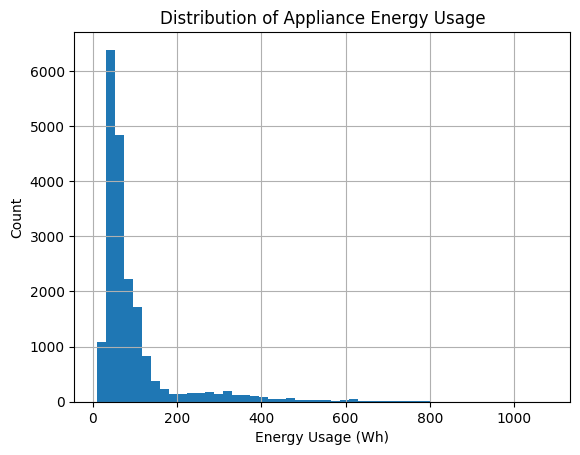

In [6]:
# 3.1 Check for bias in targets
plt.hist(target, bins=50)
plt.title("Distribution of Appliance Energy Usage")
plt.xlabel("Energy Usage (Wh)")
plt.ylabel("Count")
plt.grid()
plt.show()


In [7]:
# 3.2 Mitigation: Rebalancing
# Clip or oversample lower values (example strategy)
filtered_df = df[df['Appliances'] < 400]  # Remove extreme values


Set 4 - HD task

In [8]:
# 4.1 Reproduce key experiments - toy modulo dataset
import random

def generate_mod_dataset(size=1000, mod=5):
    X = torch.randint(0, 100, (size, 1)).float()
    y = (X % mod).float()
    return X, y

X_train, y_train = generate_mod_dataset(2048, mod=5)
X_test, y_test = generate_mod_dataset(512, mod=5)

class ModNet(nn.Module):
    def __init__(self):
        super(ModNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 256),
            nn.ReLU(),
            nn.Linear(256, 5)  # 5 classes
        )

    def forward(self, x):
        return self.model(x)

model = ModNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

train_dataset = DataLoader(TensorDataset(X_train, y_train.long().view(-1)), batch_size=64, shuffle=True)

for epoch in range(100):
    model.train()
    epoch_loss = 0
    for xb, yb in train_dataset:
        out = model(xb)
        loss = criterion(out, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    print(f"Epoch {epoch+1}: {epoch_loss:.4f}")


Epoch 1: 111.7568
Epoch 2: 56.8671
Epoch 3: 53.8006
Epoch 4: 53.7209
Epoch 5: 53.7887
Epoch 6: 53.0499
Epoch 7: 53.1295
Epoch 8: 55.8313
Epoch 9: 54.7838
Epoch 10: 54.7337
Epoch 11: 56.3847
Epoch 12: 56.1610
Epoch 13: 54.1675
Epoch 14: 55.1828
Epoch 15: 54.9936
Epoch 16: 53.9398
Epoch 17: 58.5058
Epoch 18: 54.3533
Epoch 19: 53.1964
Epoch 20: 53.4730
Epoch 21: 54.0338
Epoch 22: 53.8721
Epoch 23: 55.0120
Epoch 24: 53.5180
Epoch 25: 54.3001
Epoch 26: 53.1110
Epoch 27: 53.1223
Epoch 28: 55.1258
Epoch 29: 55.3787
Epoch 30: 55.9806
Epoch 31: 55.3950
Epoch 32: 54.3799
Epoch 33: 53.6814
Epoch 34: 52.8007
Epoch 35: 54.6359
Epoch 36: 58.7558
Epoch 37: 53.1336
Epoch 38: 53.3599
Epoch 39: 56.0310
Epoch 40: 55.4427
Epoch 41: 55.2726
Epoch 42: 52.7398
Epoch 43: 51.7609
Epoch 44: 52.1056
Epoch 45: 54.2413
Epoch 46: 56.1882
Epoch 47: 54.5852
Epoch 48: 53.1701
Epoch 49: 53.6970
Epoch 50: 55.1109
Epoch 51: 52.0881
Epoch 52: 55.2808
Epoch 53: 55.1850
Epoch 54: 52.7681
Epoch 55: 53.0047
Epoch 56: 53.4319
